In [160]:
import pandas as pd
import numpy as np
import math
import itertools
import scipy.stats as stats

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors.kde import KernelDensity
%matplotlib inline

download_data_train = pd.read_csv("..\download\\train.csv")
download_data_test = pd.read_csv("..\download\\test.csv")

#create new labels
data_train_labels = pd.DataFrame(download_data_train, columns = ['PassengerId', 'Survived'])

#create one table for easier data preparation
download_data_train["trainOrTest"] = "train"
download_data_test["trainOrTest"] = "test"
download_data_train_sub = download_data_train.drop(["Survived"], axis=1)
data_train_test_all = pd.concat([download_data_train_sub, download_data_test])

data_train_test_all["Fare"] = data_train_test_all["Fare"].apply(lambda x: x if not math.isnan(x) else np.mean(data_train_test_all['Fare']))
data_train_test_all["Sex"] = data_train_test_all["Sex"].apply(lambda x: 1 if x == "male" else 0)
data_train_test_all["Embarked"] = data_train_test_all["Embarked"].apply(lambda x: 2 if x == "C" else (1 if x == 'Q' else 0))

data_train_test_all['Title'] = data_train_test_all.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
data_train_test_all['Title'] = data_train_test_all['Title'].replace('Mlle', 'Miss')
data_train_test_all['Title'] = data_train_test_all['Title'].replace('Ms', 'Miss')
data_train_test_all['Title'] = data_train_test_all['Title'].replace('Mme', 'Mrs')
data_train_test_all['Title'] = data_train_test_all['Title'].apply(lambda x: x if x in ['Master', 'Miss', 'Mr', 'Mrs'] else 'Rare')
title_map = {'Mrs': 4, 'Miss': 3, 'Master': 2, 'Mr' : 1, 'Rare' : 0}
data_train_test_all['Title'] = data_train_test_all['Title'].map(title_map)

data_train_test_all = data_train_test_all.drop(["Ticket"], axis=1)
data_train_test_all = data_train_test_all.drop(["Cabin"], axis=1)
data_train_test_all = data_train_test_all.drop(["Name"], axis=1)

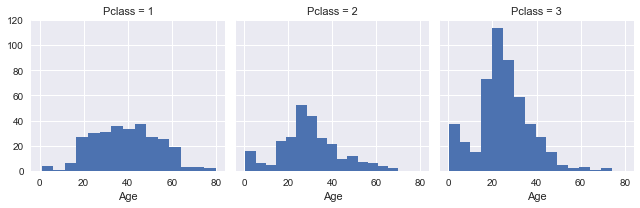

In [161]:
new_data = pd.DataFrame(data_train_test_all, columns = ['Pclass','Age'])
new_data["Age"] = new_data["Age"].apply(lambda x: 0 if math.isnan(x) else x)
new_data = new_data[new_data["Age"] != 0]
#new_data['Age'] = np.log(new_data['Age'])
age = sns.FacetGrid(new_data, col='Pclass')
age.map(plt.hist, 'Age', bins=15)

In [162]:
class1 = new_data[new_data['Pclass'] == 1]
class2 = new_data[new_data['Pclass'] == 2]
class3 = new_data[new_data['Pclass'] == 3]

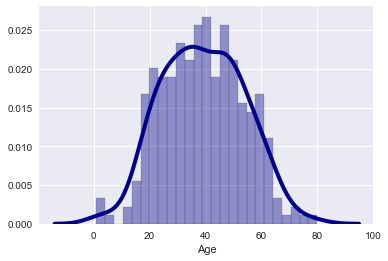

In [163]:
c1 = sns.distplot(class1['Age'], hist=True, kde=True, 
             bins=int(180/7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

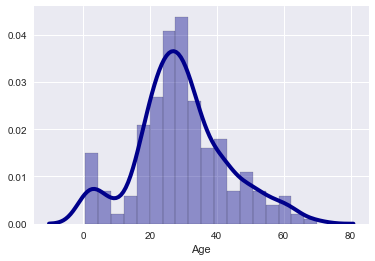

In [164]:
c2 = sns.distplot(class2['Age'], hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

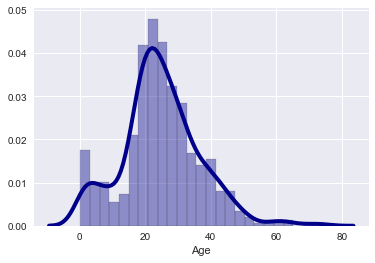

In [165]:
c3 = sns.distplot(class3['Age'], hist=True, kde=True, 
             bins=int(180/7), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [166]:
kde_tophat = KernelDensity(kernel='tophat', bandwidth=0.2)
kde_tophat.fit(class3)
print(np.sum(np.matmul(kde_tophat.score_samples(class3),kde_tophat.score_samples(class3))))

1972.16212267


In [167]:
new = kde_tophat.sample()[0][1]
new

19.891379410726035

In [168]:
l = []
for x in new:
    l.append(x[1])
plt.hist(l,bins=int(180/7))
plt.show()

TypeError: 'numpy.float64' object is not iterable